In [17]:
#JYSYRMSSLXBJRNGBLI

In [20]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Input,Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy,MeanSquaredError,BinaryCrossentropy
from keras.optimizers import gradient_descent_v2
from tensorflow.keras.optimizers import SGD

In [ ]:
sgd = gradient_descent_v2.SGD()

In [21]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [22]:
from keras.layers.serialization import activation
#defining model
def model(input_shape):
    VGG = tf.keras.applications.vgg16.VGG16(include_top = False, weights = "imagenet", input_shape = input_shape)
    
    VGG.trainable = False
    
    inputs = tf.keras.Input(shape = input_shape)
    
    # Bounding_box prediction
    
    x = VGG(inputs,training = False)
    
    x1 = Conv2D(1024,(3,3), activation = "relu")(x)
    
    x1_a = Flatten()(x1)
    
    x1_b = Dense(512, activation = "relu")(x1_a)

    x1_b = Dense(256, activation = "relu")(x1_b)
    
    x2 = Conv2D(1024,(1,1), activation = "relu")(x1)
    
    x3 = Conv2D(256,(3,3), activation = "relu")(x2)
    
    x3_a = Flatten()(x3)
    
    x3_b = Dense(256, activation = "relu")(x3_a)

    x3_b = Dense(128, activation = 'relu')(x3_b)
    
    x4 = Conv2D(128,(3,3), activation = "relu")(x3)
    
    x5 = Conv2D(128,(1,1), activation = "relu", )(x4)
    
    x5_a = Flatten()(x5)
    
    x5_b = Dense(128, activation = "relu")(x5_a)
    
        
    #Bounding Box Prediction
    output_class1 = Dense(4, activation = 'softmax', name = 'output_class1')(x1_b)
    output_class2 = Dense(4, activation = 'softmax', name = 'output_class2')(x1_b)
    output_class3 = Dense(4, activation = 'softmax', name = 'output_class3')(x3_b)
    output_class4 = Dense(4, activation = 'softmax', name = 'output_class4')(x3_b)
    output_class5 = Dense(4, activation = 'softmax', name = 'output_class5')(x5_b)
    output_class6 = Dense(4, activation = 'softmax', name = 'output_class6')(x5_b)
    
    model = Model(inputs,outputs = [output_class1,output_class2,output_class3,output_class4,output_class5,output_class6])
    
    return model
    
    

In [ ]:
a = [1,3,5,6]

a = [10*x for x in a]
a

In [23]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
!unzip -q /content/train3_zip.zip -d /content

In [25]:
directory_im = "/content/train3/images"
directory_lb = "/content/train3/labels"

In [26]:
label_paths = []
for root, directories, files in os.walk(directory_lb):
    for filename in files:
        file_path = os.path.join(root, filename)
        label_paths.append(file_path)


In [27]:
#checking for empty CSVs
for label_path in label_paths:
    with open(label_path, 'r') as f:
            lines = f.readlines()
        # check if the file is empty
    if len(lines) == 0:
            print(f'{label_path} is empty')

In [28]:
image_paths = []
for root, directories, files in os.walk(directory_im):
    for filename in files:
        file_path = os.path.join(root, filename)
        image_paths.append(file_path)

In [29]:
image_paths = sorted(image_paths)
label_paths = sorted(label_paths)

In [30]:
label_paths

['/content/train3/labels/0000000000_jpg.rf.282296722a5e40a3b1bfea38096bf319.txt',
 '/content/train3/labels/0000000000_jpg.rf.2cd95b07adc1aa5a82555595ee589978.txt',
 '/content/train3/labels/0000000000_jpg.rf.546367e92931f7427eeb20ebcfffcd44.txt',
 '/content/train3/labels/0000000000_jpg.rf.7229e60baa5c219fb17ebcc4b3095e8c.txt',
 '/content/train3/labels/0000000000_jpg.rf.bc7c0c382b9d56553770fa0b473cf6d8.txt',
 '/content/train3/labels/0000000001_jpg.rf.7454eca4103f6ef3abe1904ae2f57b28.txt',
 '/content/train3/labels/0000000003_jpg.rf.1be0ea0fdc5ed0461765c55fe0a2491f.txt',
 '/content/train3/labels/0000000003_jpg.rf.547254e9c3e3165d6310c70842100962.txt',
 '/content/train3/labels/0000000003_jpg.rf.7a7a7d0ddef7ed8abb76b9d2aa0e6511.txt',
 '/content/train3/labels/0000000003_jpg.rf.c385487b2ba2c90af0f5b0d81cdca9ed.txt',
 '/content/train3/labels/0000000003_jpg.rf.d88ade761d8e664edadacc742932c3a7.txt',
 '/content/train3/labels/0000000005_jpg.rf.30f43e179c3fedf0b58b416642f6dabc.txt',
 '/content/train

In [31]:
image_paths

['/content/train3/images/0000000000_jpg.rf.282296722a5e40a3b1bfea38096bf319.jpg',
 '/content/train3/images/0000000000_jpg.rf.2cd95b07adc1aa5a82555595ee589978.jpg',
 '/content/train3/images/0000000000_jpg.rf.546367e92931f7427eeb20ebcfffcd44.jpg',
 '/content/train3/images/0000000000_jpg.rf.7229e60baa5c219fb17ebcc4b3095e8c.jpg',
 '/content/train3/images/0000000000_jpg.rf.bc7c0c382b9d56553770fa0b473cf6d8.jpg',
 '/content/train3/images/0000000001_jpg.rf.7454eca4103f6ef3abe1904ae2f57b28.jpg',
 '/content/train3/images/0000000003_jpg.rf.1be0ea0fdc5ed0461765c55fe0a2491f.jpg',
 '/content/train3/images/0000000003_jpg.rf.547254e9c3e3165d6310c70842100962.jpg',
 '/content/train3/images/0000000003_jpg.rf.7a7a7d0ddef7ed8abb76b9d2aa0e6511.jpg',
 '/content/train3/images/0000000003_jpg.rf.c385487b2ba2c90af0f5b0d81cdca9ed.jpg',
 '/content/train3/images/0000000003_jpg.rf.d88ade761d8e664edadacc742932c3a7.jpg',
 '/content/train3/images/0000000005_jpg.rf.30f43e179c3fedf0b58b416642f6dabc.jpg',
 '/content/train

In [32]:
X_train = []
for img_path in image_paths:
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #image_resized = tf.image.resize(image, (224,224))
    X_train.append(image)
X_train = np.array(X_train, dtype = np.uint8)

In [33]:
X_train.shape

(1202, 270, 360, 3)

In [39]:
Y_train_conf = []
Y_train = [] #class
Y_train_bbox = []
for label_path in label_paths:
    conf = np.ones((6,1))   #confidence
    label = np.zeros((6,4))
    label1 = np.ones((6,1))*3
    label[:,0:2] = 0.5
    label[:,2:] = 1
    lab = pd.read_csv(label_path,sep = ' ', header = None)
    rows = lab.shape[0]
    if rows>6:
        rows = 6
    if rows < 6:
        for k in range(rows,6):
            conf[k] = 0  
    label[:rows,:]= lab.iloc[:rows,-4:]
    label = [100*x for x in label]
    label1[:rows,0]= lab.iloc[:rows,0]
    Y_train.append(label1)
    Y_train_bbox.append(label)
    Y_train_conf.append(conf)
Y_train = np.array(Y_train)
Y_train_bbox = np.array(Y_train_bbox)
Y_train_conf = np.array(Y_train_conf)

In [40]:
print(Y_train_conf)

[[[1.]
  [1.]
  [1.]
  [0.]
  [0.]
  [0.]]

 [[1.]
  [1.]
  [1.]
  [1.]
  [1.]
  [0.]]

 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 ...

 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[1.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[1.]
  [1.]
  [1.]
  [1.]
  [0.]
  [0.]]]


In [ ]:
print(Y_train_bbox)


In [41]:
print(Y_train)

[[[0.]
  [0.]
  [0.]
  [3.]
  [3.]
  [3.]]

 [[1.]
  [2.]
  [0.]
  [0.]
  [2.]
  [3.]]

 [[2.]
  [3.]
  [3.]
  [3.]
  [3.]
  [3.]]

 ...

 [[2.]
  [3.]
  [3.]
  [3.]
  [3.]
  [3.]]

 [[2.]
  [1.]
  [3.]
  [3.]
  [3.]
  [3.]]

 [[2.]
  [0.]
  [1.]
  [2.]
  [3.]
  [3.]]]


In [42]:
print(Y_train.shape)
print(Y_train_bbox.shape)
print(Y_train_conf.shape)

(1202, 6, 1)
(1202, 6, 4)
(1202, 6, 1)


In [43]:
X_train_sm = X_train[:]
X_train_sm.shape

(1202, 270, 360, 3)

In [44]:
Y_train_sm = Y_train[:]
Y_train_bbox_sm = Y_train_bbox[:]
Y_train_conf_sm = Y_train_conf[:]

In [45]:
Y_train_bbox_sm

array([[[ 51.94444444,  50.37037037,  15.13888889,   8.33333333],
        [ 38.88888889,  50.18518519,   8.05555556,   8.14814815],
        [ 83.47222222,  49.25925926,  19.86111111,  11.66666667],
        [ 50.        ,  50.        , 100.        , 100.        ],
        [ 50.        ,  50.        , 100.        , 100.        ],
        [ 50.        ,  50.        , 100.        , 100.        ]],

       [[ 52.22222222,  48.33333333,  10.97222222,  18.51851852],
        [ 40.        ,  49.25925926,   4.86111111,  12.77777778],
        [  6.38888889,  50.18518519,  12.77777778,  10.92592593],
        [ 30.69444444,  47.03703704,  12.36111111,   6.2962963 ],
        [ 22.91666667,  49.07407407,   4.44444444,  11.48148148],
        [ 50.        ,  50.        , 100.        , 100.        ]],

       [[ 38.61111111,  51.48148148,   7.22222222,  22.77777778],
        [ 50.        ,  50.        , 100.        , 100.        ],
        [ 50.        ,  50.        , 100.        , 100.        ],
      

In [46]:
print(Y_train_sm.shape)
print(Y_train_bbox_sm.shape)
print(Y_train_conf_sm.shape)

(1202, 6, 1)
(1202, 6, 4)
(1202, 6, 1)


In [47]:
Y_train_bbox_sm

array([[[ 51.94444444,  50.37037037,  15.13888889,   8.33333333],
        [ 38.88888889,  50.18518519,   8.05555556,   8.14814815],
        [ 83.47222222,  49.25925926,  19.86111111,  11.66666667],
        [ 50.        ,  50.        , 100.        , 100.        ],
        [ 50.        ,  50.        , 100.        , 100.        ],
        [ 50.        ,  50.        , 100.        , 100.        ]],

       [[ 52.22222222,  48.33333333,  10.97222222,  18.51851852],
        [ 40.        ,  49.25925926,   4.86111111,  12.77777778],
        [  6.38888889,  50.18518519,  12.77777778,  10.92592593],
        [ 30.69444444,  47.03703704,  12.36111111,   6.2962963 ],
        [ 22.91666667,  49.07407407,   4.44444444,  11.48148148],
        [ 50.        ,  50.        , 100.        , 100.        ]],

       [[ 38.61111111,  51.48148148,   7.22222222,  22.77777778],
        [ 50.        ,  50.        , 100.        , 100.        ],
        [ 50.        ,  50.        , 100.        , 100.        ],
      

In [ ]:
#shuffling the data
length = X_train.shape[0]
shuffle_indexes = np.random.permutation(length)
X_train_s = X_train[shuffle_indexes]
Y_train_s = Y_train[shuffle_indexes]
Y_train_bbox_s = Y_train_bbox[shuffle_indexes]
Y_train_conf_s = Y_train_conf[shuffle_indexes]

In [48]:
input_shape=(270,360,3) 
model = model(input_shape)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
model =keras.models.load_model('/content/adam_colab_non_pad_2.h5')

In [49]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 270, 360, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 8, 11, 512)   14714688    ['input_2[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 6, 9, 1024)   4719616     ['vgg16[0][0]']                  
                                                                                                  
 conv2d_1 (Conv2D)              (None, 6, 9, 1024)   1049600     ['conv2d[0][0]']             

In [ ]:
def frobenius_norm(m):
    """This function is to calculate the frobenius norm of the matrix of all
    layer's weight.
  
    Args:
        m: is a list of weights param for each layers.
    """
    total_reduce_sum = 0
    for i in range(len(m)):
        total_reduce_sum = total_reduce_sum + tf.math.reduce_sum(m[i]**2)
    norm = total_reduce_sum**0.5
    return norm

In [ ]:
SGD_frobenius_norm_of_weight = []
SGD_get_weight_norm = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda batch, logs: SGD_frobenius_norm_of_weight.append(
        frobenius_norm(model.trainable_weights).numpy()))

In [50]:

model.compile(optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    weight_decay = 0.0005,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name='Adam',
),
              loss={'output_class1': SparseCategoricalCrossentropy(),'output_class2': SparseCategoricalCrossentropy(),'output_class3': SparseCategoricalCrossentropy(),'output_class4':SparseCategoricalCrossentropy(),'output_class5':SparseCategoricalCrossentropy(),'output_class6':SparseCategoricalCrossentropy()},
              metrics={'output_class1': 'accuracy','output_class2': 'accuracy','output_class3': 'accuracy','output_class4': 'accuracy','output_class5': 'accuracy','output_class6': 'accuracy'})



In [ ]:
model.fit(X_train_sm, [Y_train_conf_sm[:,0,:],Y_train_conf_sm[:,1,:],Y_train_conf_sm[:,2,:],Y_train_conf_sm[:,3,:],Y_train_conf_sm[:,4,:],Y_train_conf_sm[:,5,:],Y_train_bbox_sm[:,0,:],Y_train_bbox_sm[:,1,:],Y_train_bbox_sm[:,2,:],Y_train_bbox_sm[:,3,:],Y_train_bbox_sm[:,4,:],Y_train_bbox_sm[:,5,:]], batch_size=32, epochs=200)

Epoch 1/200
38/38 [==============================] - 11s 287ms/step - loss: 3.4015 - conf1_loss: 4.7292e-11 - conf2_loss: 1.0140e-06 - conf3_loss: 0.0024 - conf4_loss: 3.1219e-07 - conf5_loss: 3.8509e-06 - conf6_loss: 4.0658e-07 - output_box1_loss: 0.2688 - output_box2_loss: 0.3121 - output_box3_loss: 2.1025 - output_box4_loss: 0.3686 - output_box5_loss: 0.1885 - output_box6_loss: 0.1586 - conf1_accuracy: 1.0000 - conf2_accuracy: 1.0000 - conf3_accuracy: 0.9992 - conf4_accuracy: 1.0000 - conf5_accuracy: 1.0000 - conf6_accuracy: 1.0000 - output_box1_mse: 0.2688 - output_box2_mse: 0.3121 - output_box3_mse: 2.1025 - output_box4_mse: 0.3686 - output_box5_mse: 0.1885 - output_box6_mse: 0.1586
Epoch 2/200
38/38 [==============================] - 11s 284ms/step - loss: 3.1126 - conf1_loss: 3.9034e-11 - conf2_loss: 9.9770e-07 - conf3_loss: 0.0025 - conf4_loss: 3.7466e-07 - conf5_loss: 3.8284e-06 - conf6_loss: 3.7320e-07 - output_box1_loss: 0.2505 - output_box2_loss: 0.2671 - output_box3_loss: 

SAVING THE MODEL

In [ ]:
pip install h5py pyyaml

In [ ]:
model.save('adam_colab_non_pad_9.h5')

In [ ]:
X_train.shape

(1202, 270, 360, 3)

In [ ]:
pred1 = model.predict(X_train[70:80])

1/1 [==============================] - 0s 268ms/step


In [ ]:
pred1

In [ ]:
predictions = np.zeros((10,6,4))
for i in range(10):
  for j in range(6):
    predictions[i][j][:] = pred1[j+6][i][:]

In [ ]:
img = X_train[70]
bbox = Y_train_bbox[70]

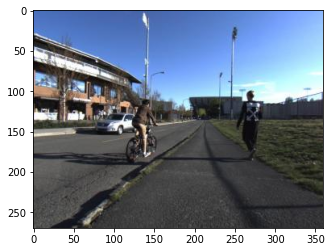

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imwrite("img_2.jpg",img)

In [ ]:
bbox

array([[ 39.30555556,  55.18518519,  12.5       ,  27.22222222],
       [ 74.86111111,  51.66666667,  10.        ,  31.2962963 ],
       [ 29.30555556,  51.48148148,  14.16666667,   9.81481481],
       [ 50.        ,  50.        , 100.        , 100.        ],
       [ 50.        ,  50.        , 100.        , 100.        ],
       [ 50.        ,  50.        , 100.        , 100.        ]])

In [ ]:
predictions[0]

array([[ 38.94901276,  54.0595665 ,  10.99409962,  25.02440834],
       [ 72.61398315,  52.69955444,  11.25329494,  32.69987106],
       [ 30.95597458,  50.18591309,  14.52525806,  10.05034924],
       [ 50.47871017,  50.72293854,  99.47882843, 101.37967682],
       [ 50.05434036,  49.85756683,  99.82040405,  99.74501801],
       [ 49.89044952,  50.05990219, 100.47538757, 100.1980896 ]])

In [ ]:
print(img)
print(bbox[2])

In [ ]:
cut = [30.95597458,  50.18591309,  14.52525806,  10.05034924]
x1 = int(cut[0] * 3.6)
y1 = int(cut[1] * 2.7)
xw = int(cut[2] * 3.6)
yw = int(cut[3] * 2.7)
start_point = [x1 - xw, y1 - yw ]
end_point  = [x1 + xw, y1 + yw ]
for i in range(2):
    if start_point[i] <0 :
        start_point[i] = 0
    if end_point[i]<0:
        end_point[i] = 0
print(start_point)
print(end_point)

[59, 108]
[163, 162]


In [ ]:
image = cv2.rectangle(img, start_point, end_point,(255,0,255),2)

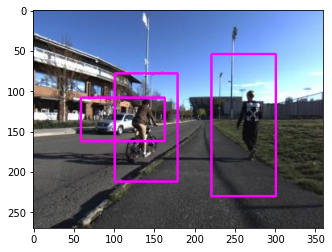

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imwrite('img1.jpg',image)

True

In [ ]:
plt.imshow(imag)

In [ ]:
test_im = "D:\\train_big\\new_train\\2019_04_30_mlms001\\images"
test_lbl = "D:\\Train_selected\\test\\labels"

In [ ]:
image_paths_test = []
for root, directories, files in os.walk(test_im):
    for filename in files:
        file_path = os.path.join(root, filename)
        image_paths_test.append(file_path)

In [ ]:
image_paths_test

In [ ]:
X_test = []
for img_path in image_paths_test:
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = tf.image.resize(image, (270,360))
    X_test.append(image_resized.numpy())
X_test = np.array(X_test, dtype = np.uint8)

In [ ]:
X_test.shape

In [ ]:
pred = model.predict(X_test[:50])

In [ ]:
pred

In [ ]:
image1 = X_test[8]

In [ ]:
plt.imshow(image1)

In [ ]:
cut = [ 7.3935957 ,  59.0682106 ,  17.76771355,  39.85256958]
x1 = int(cut[0] * 3.6)
y1 = int(cut[1] * 2.7 )
xw = int(cut[2] * 3.6 )
yw = int(cut[3] * 2.7)
start_point = [x1 - xw, y1 - yw ]
end_point  = [x1 + xw, y1 + yw ]
for i in range(2):
    if start_point[i] <0 :
        start_point[i] = 0
    if end_point[i]<0:
        end_point[i] = 0
print(start_point)
print(end_point)

[0, 52]
[89, 266]


In [ ]:
image2 = cv2.rectangle(image1, start_point, end_point,(255,255,0),1)

NameError: ignored

In [ ]:
plt.imshow(image2)

In [ ]:
Model =keras.models.load_model('/content/adam_colab.h5')

In [ ]:
pred3 = Model.predict(X_train[:5])

1/1 [==============================] - 2s 2s/step


In [ ]:
pred3

In [ ]:
directory_test_im = "D:\\big_test\\Images"
directory_test_lb = "D:\\big_test\\Labels"

In [ ]:
label_paths_test = []
for root, directories, files in os.walk(directory_test_lb):
    for filename in files:
        file_path = os.path.join(root, filename)
        label_paths_test.append(file_path)
    

In [ ]:
#checking for empty CSVs
for label_path in label_paths_test:
    with open(label_path, 'r') as f:
            lines = f.readlines()
        # check if the file is empty
    if len(lines) == 0:
            print(f'{label_path} is empty')

In [ ]:
image_paths_test = []
for root, directories, files in os.walk(directory_test_im):
    for filename in files:
        file_path = os.path.join(root, filename)
        image_paths_test.append(file_path)

In [ ]:
image_paths_test

In [ ]:
label_paths_test


In [ ]:

X_test = []
for img_path in image_paths_test:
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = tf.image.resize(image, (224,224))
    X_test.append(image_resized.numpy())
X_test = np.array(X_test, dtype = np.uint8)

In [ ]:
img = X_test[896]
plt.imshow(img)

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

In [ ]:
cut = [ 0.31026786, 0.54241071, 0.13392857, 0.24107143 ]
x1 = int(cut[0] * 224)
y1 = int(cut[1] * 224 )
xw = int(cut[2] * 224 )
yw = int(cut[3] * 224)
start_point = [x1 - xw, y1 - yw ]
end_point  = [x1 + xw, y1 + yw ]
for i in range(2):
    if start_point[i] <0 :
        start_point[i] = 0
    if end_point[i]<0:
        end_point[i] = 0
print(start_point)
print(end_point)

In [ ]:
image9 = cv2.rectangle(imageee, start_point, end_point,(255,255,0),1)

In [ ]:
plt.imshow(image9)